In [1]:
import requests
from selenium import webdriver
import time
import csv
from PIL import Image
import wordcloud
import numpy as np
import jieba
import pandas as pd 
from wordcloud import WordCloud, ImageColorGenerator  
import matplotlib.pyplot as plt 
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import WebDriverWait

# desired_capabilities = DesiredCapabilities.CHROME  # 修改页面加载策略
# desired_capabilities["pageLoadStrategy"] = "none"  # 注释这两行会导致最后输出结果的延迟，即等待页面加载完成再输出

In [2]:
def get_top_answer():
    browser = webdriver.Chrome()
    browser.get("https://xueqiu.com/k?q=reits#/timeline")
    time.sleep(5)
 
    for i in range(10):
        browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(3)
    articles = browser.find_elements_by_css_selector("article.timeline__item")
    #print(len(articles))
    for article in articles:
        try:
            div = article.find_element_by_css_selector("div.timeline__item__content.timeline__item__content--longtext")
        except Exception as e:
            continue
        url = div.find_element_by_css_selector("a").get_attribute("href")
        try:
            title = div.find_element_by_css_selector("h3.timeline__item__title.column").text
        except Exception as e:
            title = div.find_element_by_css_selector("h3.timeline__item__title").text
        time.sleep(3)
        content = get_top_content(url)
 
        with open('reits_snowball.csv', 'a', newline='',encoding="utf-8") as csvfile:
            mywriter = csv.writer(csvfile)
            mywriter.writerow([title,content])

In [3]:
def get_top_content(url):
    print(url)
    browser = webdriver.Chrome()
    browser.get(url)
    content =""
    ps = browser.find_element_by_css_selector("div.article__bd__detail").find_elements_by_css_selector("p")
    for p in ps:
        content += p.text
    browser.quit()
    return content

In [4]:
with open("reits_snowball.csv", 'w', newline='',encoding="utf-8") as csvfile:
        mywriter = csv.writer(csvfile)
        header = ["titile","content"]
        mywriter.writerow(header)
get_top_answer()

https://xueqiu.com/5131964483/105993162
https://xueqiu.com/1584704754/101833637
https://xueqiu.com/8493390925/113624531
https://xueqiu.com/1758860965/112262221
https://xueqiu.com/4111158370/102587920
https://xueqiu.com/1392782404/116984341
https://xueqiu.com/4583390787/110038038
https://xueqiu.com/7023440250/110707568
https://xueqiu.com/9231626955/113137399
https://xueqiu.com/5131964483/97388220
https://xueqiu.com/9684552037/107837560
https://xueqiu.com/5883062805/102782779
https://xueqiu.com/4111158370/102169386
https://xueqiu.com/1494569058/104618466
https://xueqiu.com/5168112720/111846430
https://xueqiu.com/3531105450/113276809
https://xueqiu.com/7355011921/107664641
https://xueqiu.com/3592613636/114235270
https://xueqiu.com/9124569752/114161011
https://xueqiu.com/7163443773/99712129
https://xueqiu.com/1835829265/114896009
https://xueqiu.com/7105419945/110061889
https://xueqiu.com/8895958536/114472192
https://xueqiu.com/4528167402/105714812
https://xueqiu.com/4537766805/117210739
ht

In [5]:
df = pd.read_csv('reits_snowball.csv')

In [6]:
def cut_content(df):
    all_content = df.content.tolist()
    #print(all_content)
    one_content = ''
    for content in all_content :
        #print(content)
        if type(content) == float:
            continue
        one_content +=  content
        
    words = jieba.cut(one_content)
    #set stopwords
    filepath = 'stopwords.txt'
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]   
    stopwords.extend(['一种','and', 'you', '超过'])
    processed_word_list = [] 
    for word in words:
        if word not in stopwords and len(word)>1: #remove single word
            processed_word_list.append(word)
    return processed_word_list

In [7]:
processed_word_list = cut_content(df)
print(processed_word_list)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9y/hdd1pgmn3kb7bc7tzlxh0y5w0000gn/T/jieba.cache
Loading model cost 0.748 seconds.
Prefix dict has been built succesfully.


['不明真相', '群众', 'jiancai', '聊到', '美国', 'reits', '长期', '收益率', '好于', '标普', '朋友', '索罗斯', '金融', '炼金术', 'reits', '案例', '一份', '资料', '内容', '包括', '美国', 'reits', '起源', '制度', '建立', '索罗斯', '列举', '案例', '简单', '分析', '索性', 'jiancai', '朋友', '参考', '相关', '阅读', '发达国家', '地区', 'REITs', '收益', '分析', '雪球', 'https', 'xueqiu', 'com', '5131964483', '105993748', '巴曙松', '朱江', '博士', '美国', 'REITs', '历史', '演化', '投资', '分析', '框架', '找到', '互联网', '链接', 'http', 'mini', 'eastday', 'com', '170512074251406', 'html', '不明真相', '群众', '参考', '作者', '不可考', '来源', '时代', '大资管', '本文', '内容', '朱江', '博士', '演讲', '索罗斯', '金融', '炼金术', '第一章', '股票市场', '反身', '引述', '1970', '一篇', '研报', '很长', '一段时间', '广为流传', '详解', '反身', '理论', 'Reflexivity', '预判', 'Mortgage', 'REITs', '简写', 'REITs', '启动', '繁荣', '泡沫', '最终', '破灭', '萎缩', '过程', '思路', '成功', 'REITs', '空头', '盈利', '诧异', '100%', '解释', '抛售', '额外', '股份', '市场', '下降', '过程', '中均', '获利', '颇丰', '发生', '读读', '索罗斯', '这份', '研究', '报告', '也许', '我国', 'REITs', '市场', '发展', '借鉴', '意义', '市场', '初期', '也许', '概率', '抵押', '信贷', '模式', '

{'市场': 301, '公司': 244, '投资': 238, '房地产': 200, '指数': 188, '资产': 183, '企业': 180, '行业': 171, '地产': 166, '中国': 151, '基金': 149, '融资': 138, '未来': 127, 'REITs': 113, '业务': 112, '租赁': 106, '发展': 105, '研究': 104, '美国': 100, '收益': 100, '情况': 99, '万科': 98, '金融': 95, '价值': 95, '估值': 91, '规模': 88, '增长': 88, '城市': 85, '管理': 81, '股票': 80, '过程': 78, '政策': 74, '成本': 74, '包括': 73, '价格': 73, 'reits': 72, '项目': 71, '租金': 70, '登记': 70, '账款': 70, '产品': 69, '物业': 69, '风险': 69, '影响': 69, '应收': 68, '物流': 68, '10': 67, '基本面': 65, '资金': 65, '公寓': 63, '投资者': 62, '2017': 62, '银行': 62, 'A股': 62, '信托': 61, '酒店': 61, '需求': 61, '逻辑': 60, '核心': 59, '商业': 58, '运营': 58, '杠杆': 58, '房企': 58, '收益率': 58, '整体': 57, '经济': 56, '优势': 56, '发行': 55, '阶段': 54, '券商': 54, '长期': 54, '操作': 53, '50': 53, '能力': 53, '历史': 51, '经营': 51, '时间': 50, '收入': 50, '时代': 49, '机会': 49, '销售': 49, '分红': 49, '利率': 49, '住房': 48, '模式': 48, '质押': 48, '周期': 48, '国内': 48, '资本': 47, '2018': 47, '持续': 45, '上市': 44, '增加': 43, '领域': 43, '内容': 43, '战略': 43, '300'

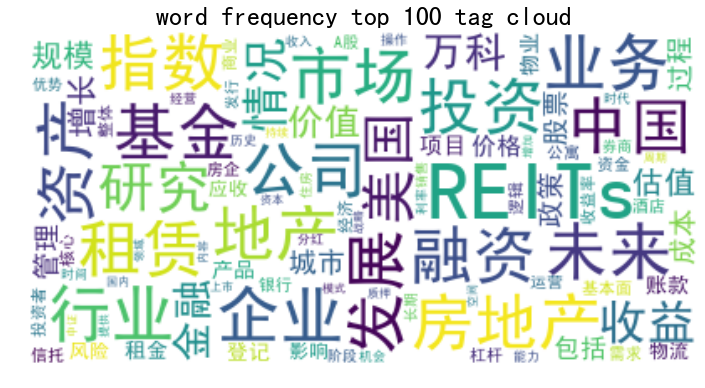

In [12]:
def word_cloud(processed_word_list, rank=100):
    word_count100 = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[:rank]
    word_count100_dict = word_count100.to_dict()
    print(word_count100_dict)
    result = " ".join(word_count100_dict)  
    
    wc = WordCloud(
        font_path="simhei.ttf",
        background_color='white',   
        max_font_size=50,   #最大字号
        
    )
    wc.generate(result)
    plt.figure(figsize=(12,16))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('word frequency top '+str(rank)+' tag cloud', loc='Center', fontsize=26)
    plt.show()
    return plt.show()

word_cloud(processed_word_list)